<a href="https://colab.research.google.com/github/mengyu14/ANLY590/blob/master/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HW 3 Q1 with PyTorch


In [36]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision as tv
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [8]:
train = tv.datasets.CIFAR10(root='data/', download=True, transform=transforms.ToTensor())
test = tv.datasets.CIFAR10(root='data/', train=False, download=True, transform=transforms.ToTensor())

Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [38]:
train_loader = torch.utils.data.DataLoader(train, batch_size=32, num_workers=0)
test_loader = torch.utils.data.DataLoader(test, batch_size=32, num_workers=0)

In [11]:
len(train)

50000

In [19]:
classes = train.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [29]:
image, label = train[0]
image.shape

torch.Size([3, 32, 32])

Label:  frog


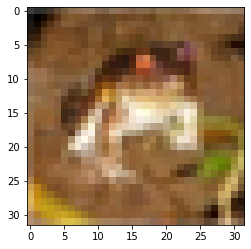

In [24]:
plt.imshow(image.permute((1, 2, 0)))
print('Label: ', classes[label])

In [40]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(16,32,kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(32,64,kernel_size=3),
            nn.ReLU())
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(64,32,kernel_size=3),
            nn.ReLU(),
            nn.ConvTranspose2d(32,16,kernel_size=3),
            nn.ReLU(),
            nn.ConvTranspose2d(16,3,kernel_size=3),
            nn.ReLU())
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [56]:
model = Autoencoder()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss = nn.MSELoss()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
)


In [59]:
for epoch in range(5):
  for x in train_loader:
    image, _ = x
    image = Variable(image).cpu()

    output = model(image)
    losses = loss(output, image)

    optimizer.zero_grad()
    losses.backward()
    optimizer.step()
  print('Epoch [{}/{}], loss:{:.4f}'.format(epoch+1, 5, losses.data))

Epoch [1/5], loss:0.0007
Epoch [2/5], loss:0.0004
Epoch [3/5], loss:0.0005
Epoch [4/5], loss:0.0005
Epoch [5/5], loss:0.0005


In [83]:
data_iteration = iter(test_loader)
images, labels = data_iteration.next()

output = model(images)
images = images.numpy()

output = output.view(32, 32, 32, 3)
output = output.detach().numpy()

Original


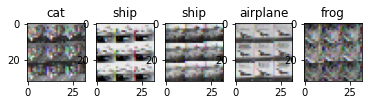

Reconstructed


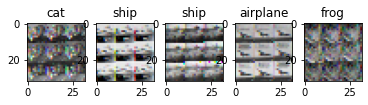

In [114]:
n = 5
print('Original')
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow((images[i].reshape(32, 32, 3)*255).astype('uint8'))
  ax.set_title(classes[labels[i]])
plt.show()
print('Reconstructed')
for i in range(n):
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow((output[i].reshape(32, 32, 3)*255).astype('uint8'))
  ax.set_title(classes[labels[i]])
plt.show() 